<a href="https://colab.research.google.com/github/jkcg-learning/HeartDiseasePrediction_XAI/blob/main/Jyothish_Kumar_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explaining Machine Learning Models using SHAP** (SHapley Additive exPlanations)

https://shap.readthedocs.io/en/latest/



**Heart Disease Prediction**

Predict if a heart disease is present or not

https://dphi.tech/practice/challenge/51

*Data Description*


* age: Age in years
* sex: 1 = male, 0 = female
* cp: Chest pain type
* trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: Resting electrocardiographic results
* thalach: Maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment
* ca: Number of major vessels (0-4) colored by fluoroscopy
* thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found
* target: 1 = Heart disease present, 0 = Heart disease not present

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the train data

heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [3]:
print(f'\nTrain contains {heart_data.shape[0]} samples and {heart_data.shape[1]} variables')


Train contains 212 samples and 14 variables


In [4]:
#loading the test data

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')
print(f'\nTest contains {test_data.shape[0]} samples and {test_data.shape[1]} variables')


Test contains 91 samples and 13 variables


In [5]:
heart_data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   48    1   2       124   255    1  ...      0      0.0      2   2     2       1
1   68    0   2       120   211    0  ...      0      1.5      1   0     2       1
2   46    1   0       120   249    0  ...      0      0.8      2   0     3       0
3   60    1   0       130   253    0  ...      1      1.4      2   1     3       0
4   43    1   0       115   303    0  ...      0      1.2      1   0     2       1

[5 rows x 14 columns]

In [6]:

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [7]:
# Checking for missing values

heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
TARGET_COL = 'target'

In [10]:
# Checking for the class imbalance

heart_data[TARGET_COL].value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


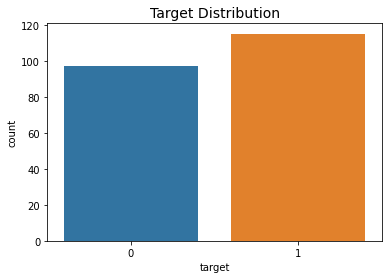

In [11]:
_ = sns.countplot(heart_data[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

In [12]:
# Checking the unique values of each column
heart_data.nunique()

age          40
sex           2
cp            4
trestbps     46
chol        134
fbs           2
restecg       3
thalach      82
exang         2
oldpeak      36
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
# Separting Categorical Columns

cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [14]:
# Separating numerical Columns

num_cols = ['age','trestbps','chol','thalach','oldpeak']

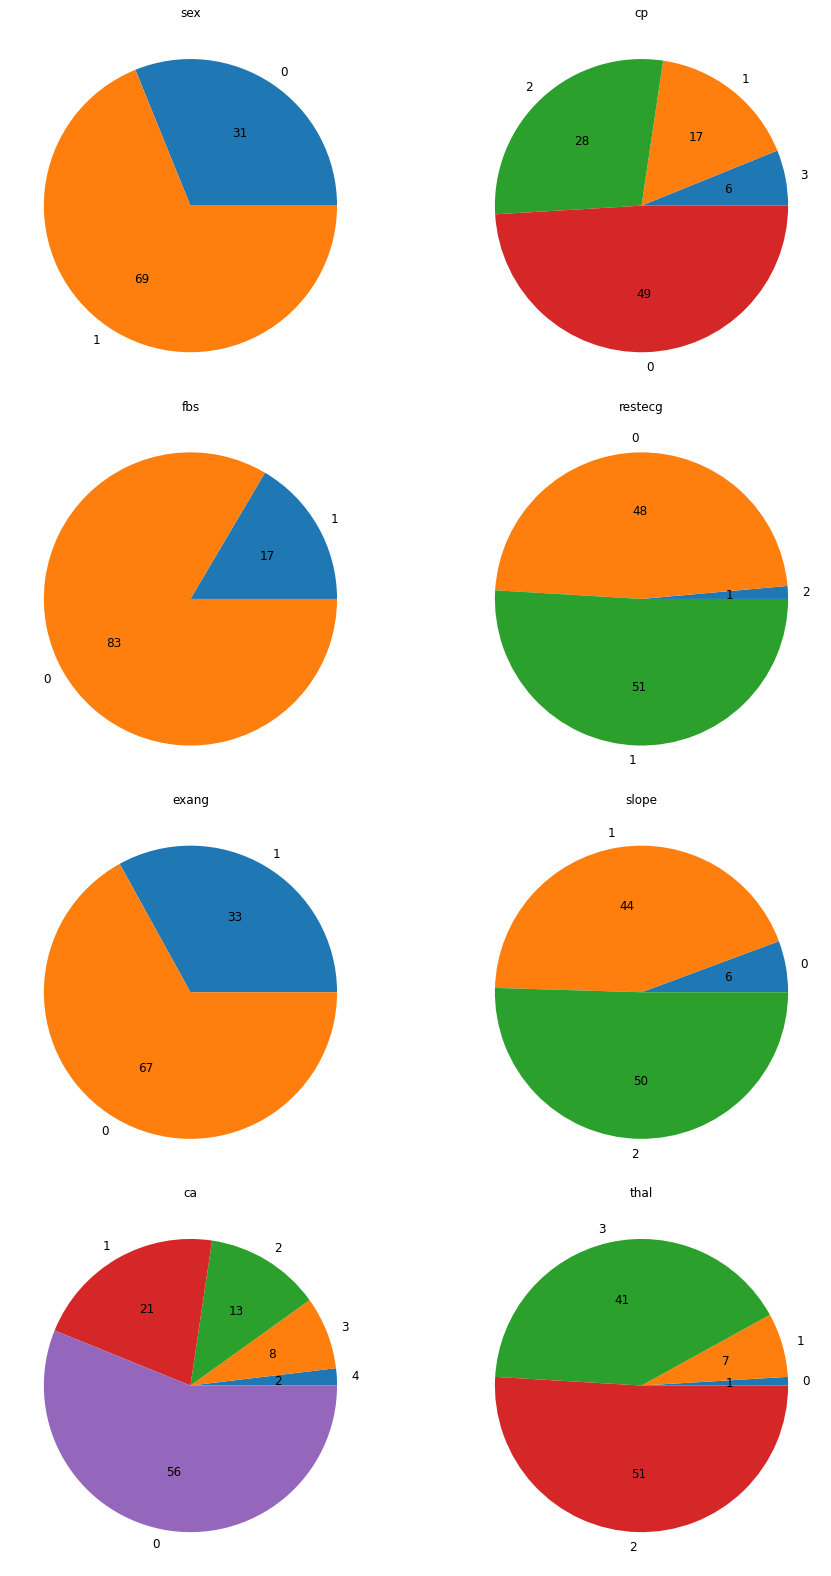

In [15]:
# Plotting the share of each categorical column

fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

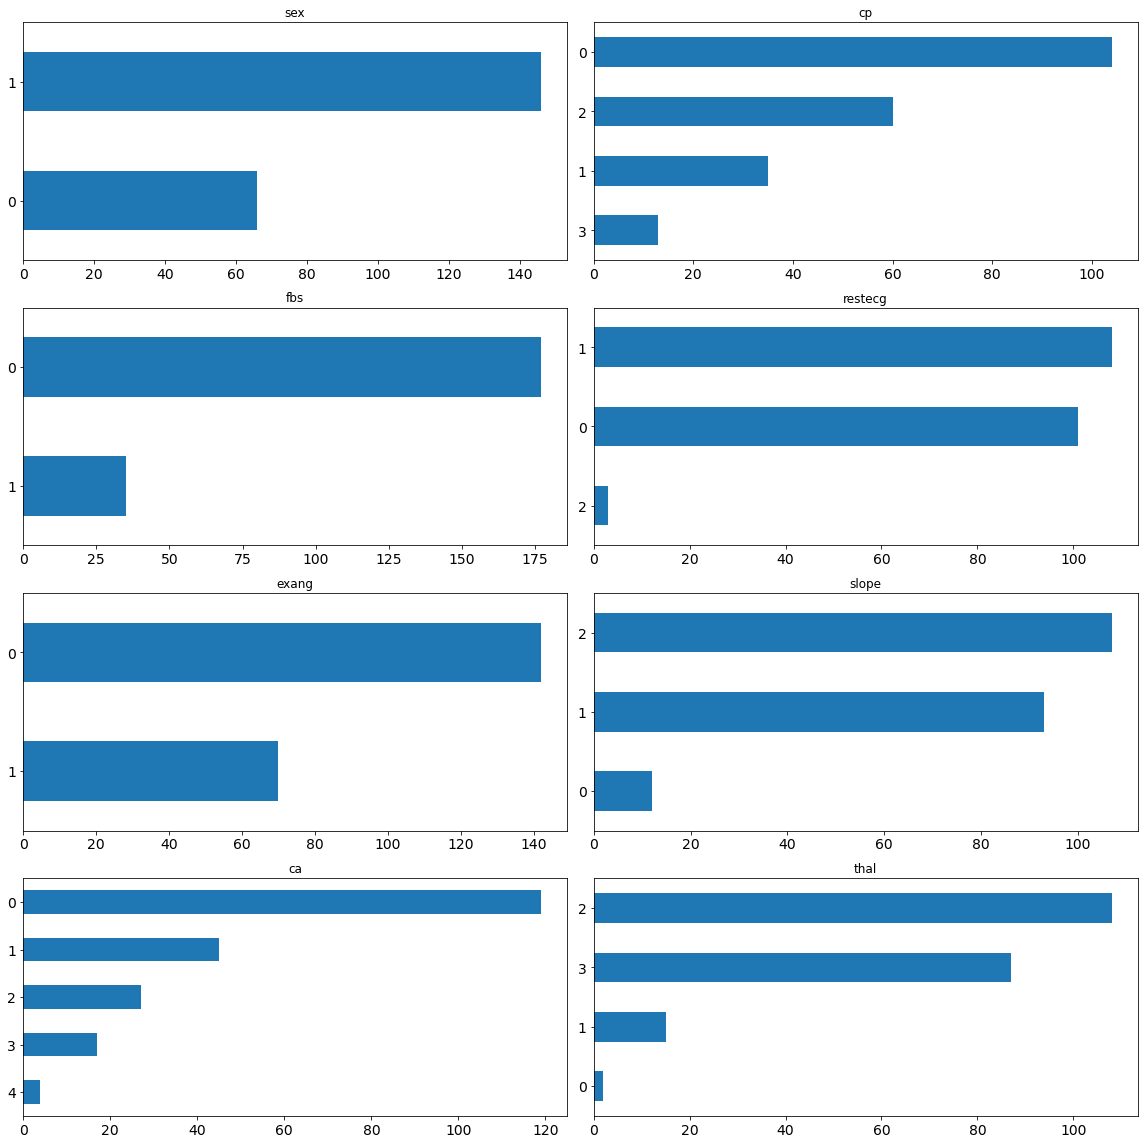

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

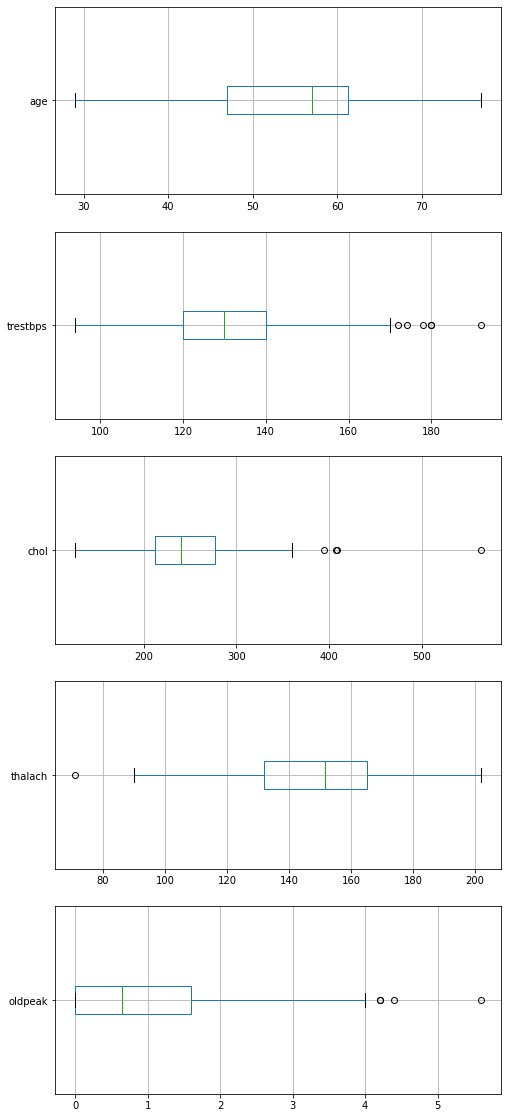

In [17]:
# Distribution of numerical columns

fig, axes = plt.subplots(5, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = heart_data[[c]].boxplot(ax=axes[i], vert=False)

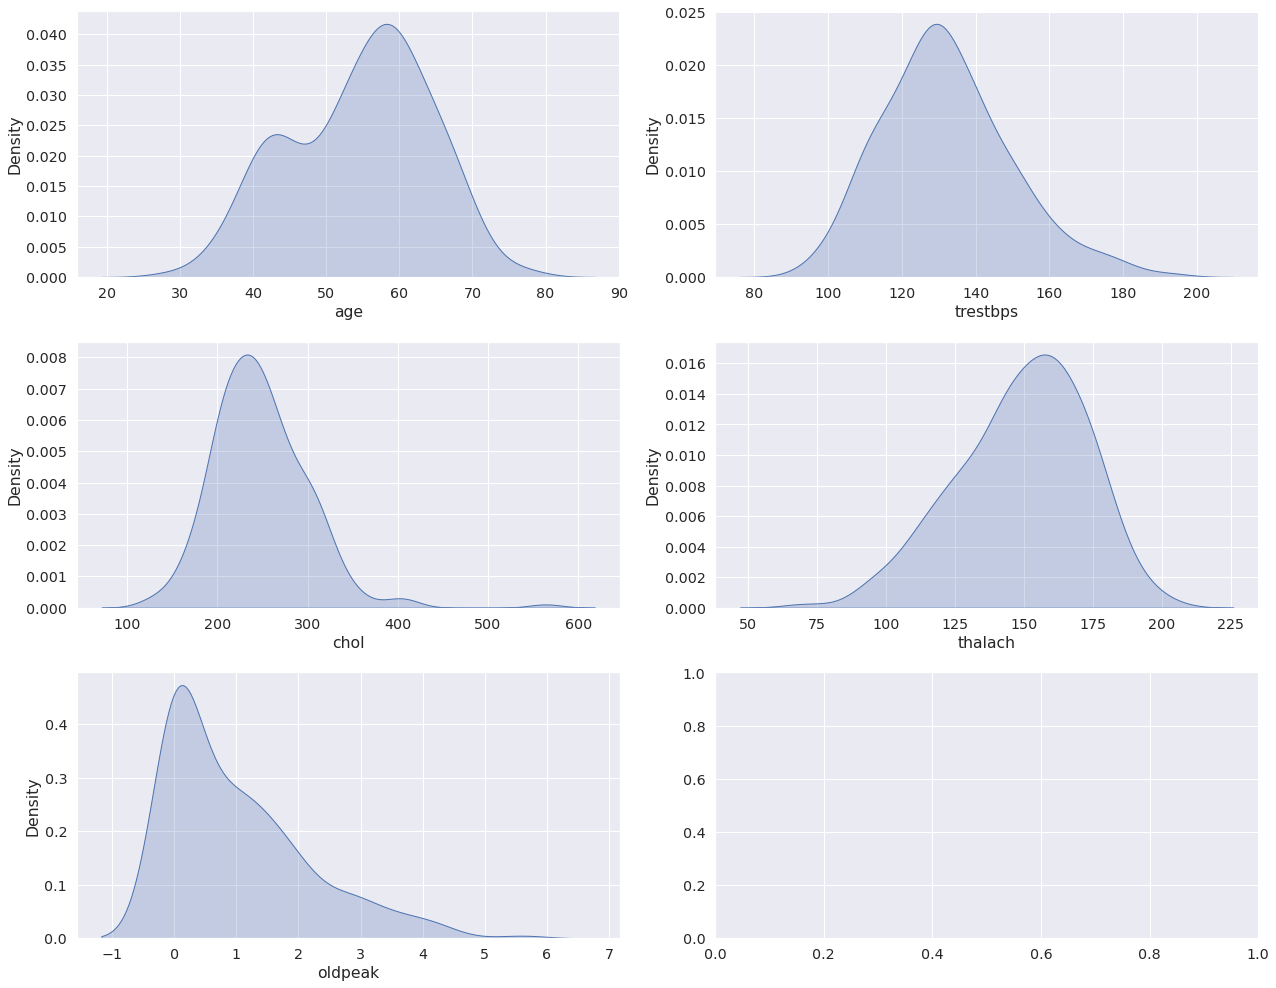

In [18]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

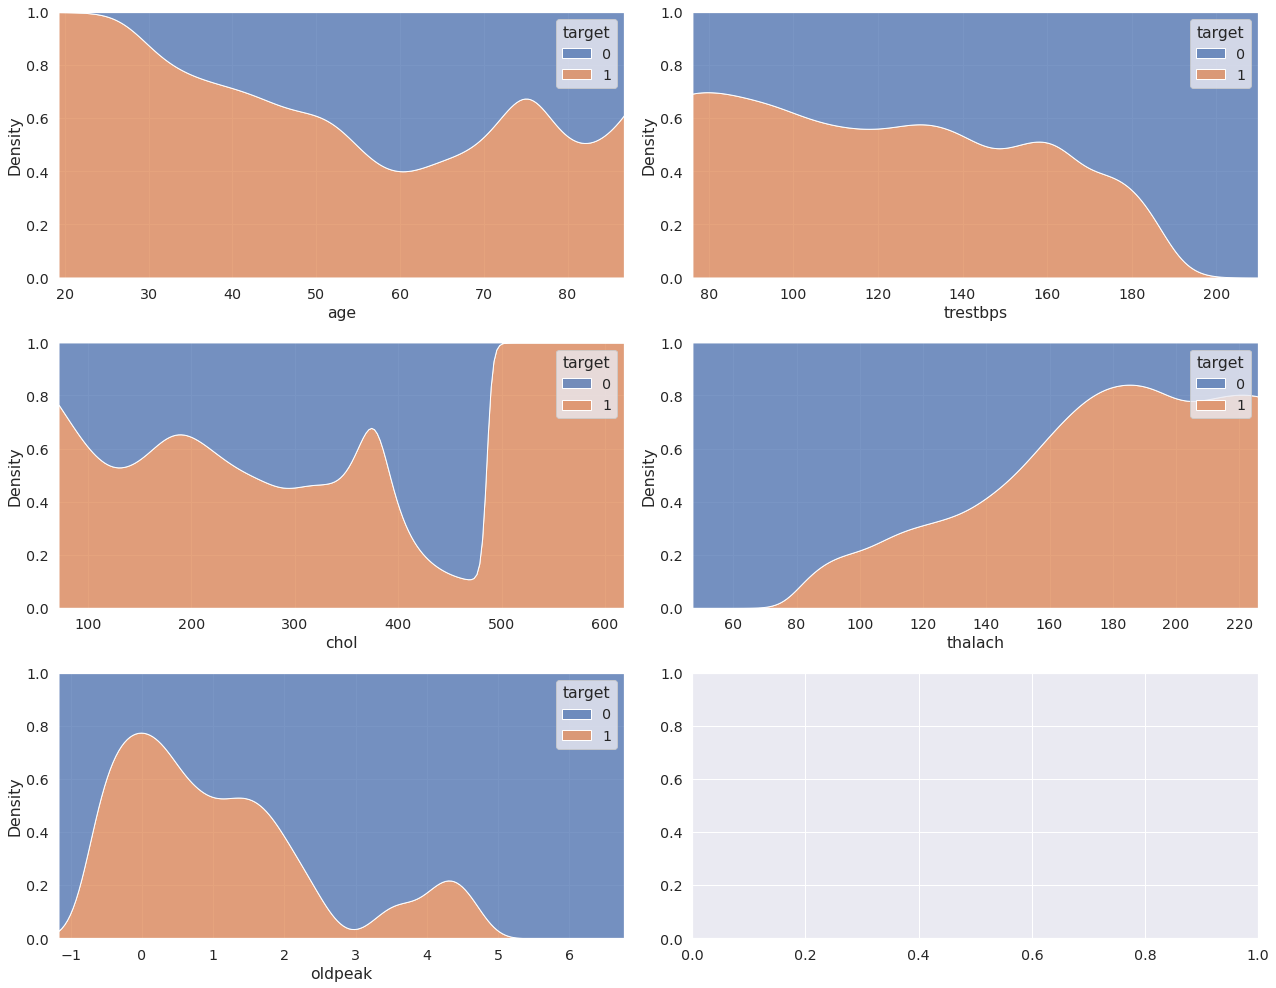

In [19]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

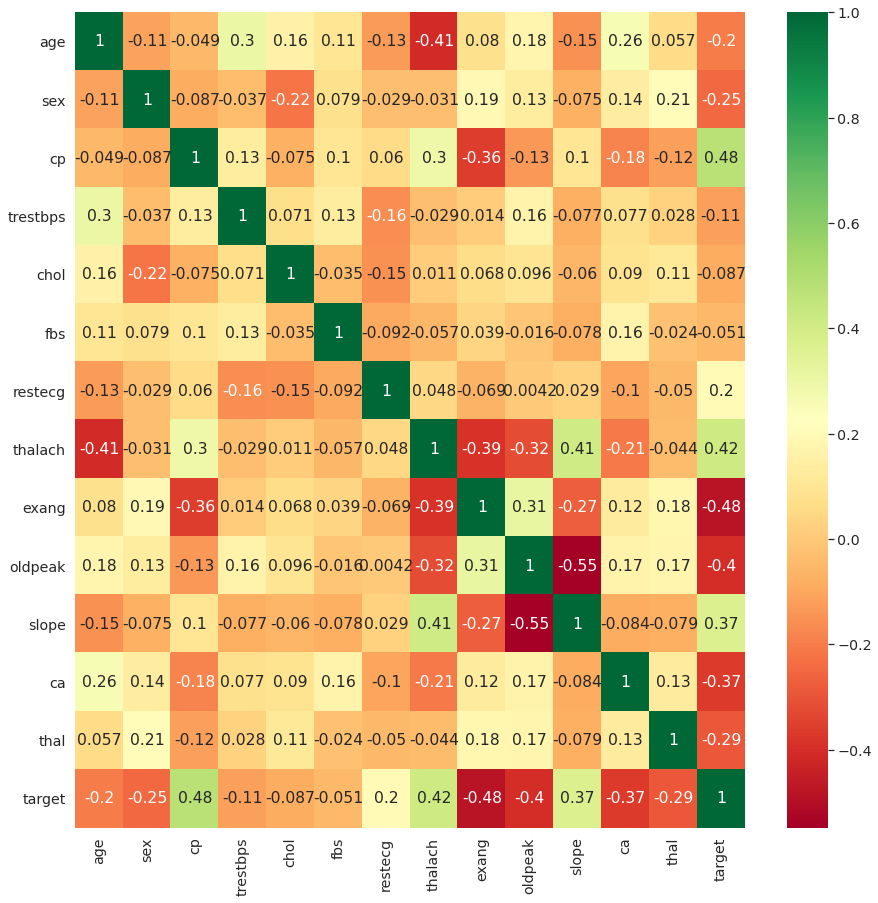

In [20]:
# Plotting the correlation with the target

plt.figure(figsize=(15, 15))
_ = sns.heatmap(heart_data.corr(), annot=True,cmap="RdYlGn")

In [21]:
# Merging train and test data set into one dataframe for easy process of one-hot encoding of categorical variables

df = pd.concat([heart_data, test_data], axis=0).reset_index(drop = True)
df.shape

(303, 14)

In [22]:
df = pd.get_dummies(df, columns = cat_cols)

In [23]:
# Scaling the numerical features using standard scaler

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
# Splitting the entire processed data back into train and test

train_proc, test_proc = df[:heart_data.shape[0]], df[heart_data.shape[0]:].reset_index(drop = True)

# marking all columns as features except for the target column (some feature selection algorithm could be used to reduce this further)

features = [c for c in train_proc.columns if c not in [TARGET_COL]]

In [25]:

len(features)

30

In [26]:
train_proc

age  trestbps  chol  thalach  ...  thal_0  thal_1  thal_2  thal_3
0     48       124   255      175  ...       0       0       1       0
1     68       120   211      115  ...       0       0       1       0
2     46       120   249      144  ...       0       0       0       1
3     60       130   253      144  ...       0       0       0       1
4     43       115   303      181  ...       0       0       1       0
..   ...       ...   ...      ...  ...     ...     ...     ...     ...
207   67       120   229      129  ...       0       0       0       1
208   58       150   283      162  ...       0       0       1       0
209   60       145   282      142  ...       0       0       0       1
210   62       124   209      163  ...       0       0       1       0
211   58       170   225      146  ...       0       1       0       0

[212 rows x 31 columns]

In [27]:
test_proc

age  trestbps  chol  thalach  oldpeak  ...  ca_4  thal_0  thal_1  thal_2  thal_3
0    46       138   243      152      0.0  ...     0       0       0       1       0
1    45       138   236      152      0.2  ...     0       0       0       1       0
2    59       160   273      125      0.0  ...     0       0       0       1       0
3    44       108   141      175      0.6  ...     0       0       0       1       0
4    47       108   243      152      0.0  ...     0       0       0       1       0
..  ...       ...   ...      ...      ...  ...   ...     ...     ...     ...     ...
86   51       140   261      186      0.0  ...     0       0       0       1       0
87   42       148   244      178      0.8  ...     0       0       0       1       0
88   56       120   240      169      0.0  ...     0       0       0       1       0
89   64       180   325      154      0.0  ...     0       0       0       1       0
90   58       120   340      172      0.0  ...     0       0       0       1       0

[91 rows x 31 columns]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [29]:
# Splitting the dataset as train set and validation set

trn, val = train_test_split(train_proc,test_size=0.2, random_state = 0, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
train_features, validation_features = trn[features], val[features]

###### Output of our model will be the TARGET_COL
train_target, validation_target = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
test_features = test_proc[features]


In [30]:
# Scaling the features using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.fit_transform(validation_features)
test_features_scaled = scaler.fit_transform(test_features)

In [31]:
# Implementing Logistic Regression

model_1_lr = LogisticRegression(random_state = 1, max_iter = 100)
_ = model_1_lr.fit(train_features_scaled, train_target)

In [32]:
# Identifying the model intercept and coefficient for each features

print("Model intercept  : ", model_1_lr.intercept_, "\n")
print("Model coefficient: ", model_1_lr.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_1_lr.coef_[0][i])

Model intercept  :  [0.04761915] 

Model coefficient:  [[ 0.33846776 -0.43699004 -0.01335066  0.24115283 -0.39517974  0.27207589
  -0.27207589 -0.73643672 -0.08518113  0.67363162  0.43474871  0.00311253
  -0.00311253 -0.27990539  0.28698612 -0.03364026  0.24446674 -0.24446674
   0.07136057 -0.58843994  0.55381361  0.66775914 -0.31857747 -0.77807687
  -0.04308459  0.45056376  0.06447413  0.28174704  0.38453075 -0.54827997]] 

age :  0.3384677633122746
trestbps :  -0.4369900385932739
chol :  -0.013350661069175233
thalach :  0.2411528297680236
oldpeak :  -0.3951797382714506
sex_0 :  0.27207589272980154
sex_1 :  -0.2720758927298017
cp_0 :  -0.736436715805343
cp_1 :  -0.08518113081209672
cp_2 :  0.6736316152444511
cp_3 :  0.43474870725766457
fbs_0 :  0.003112533585278934
fbs_1 :  -0.0031125335852790655
restecg_0 :  -0.27990538966302986
restecg_1 :  0.28698611898016774
restecg_2 :  -0.033640261599722325
exang_0 :  0.24446674292284334
exang_1 :  -0.24446674292284318
slope_0 :  0.0713605713601

In [33]:
# checking the F1 Score on Train and Validation Dataset

preds_train = model_1_lr.predict(train_features_scaled)
preds_val = model_1_lr.predict(validation_features_scaled)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.907103825136612
F1 Score on Validation Data:  0.8636363636363636


In [34]:
# Implementing XGBoost

model_2_XGB = XGBClassifier(n_estimators = 15,
                    max_depth = 6,
                    learning_rate = 0.01,
                    colsample_bytree = 0.05,
                    random_state=0,
                    )

_ = model_2_XGB.fit(train_features_scaled, train_target)


In [35]:
# checking the F1 Score on Train and Validation Dataset

preds_train = model_2_XGB.predict(train_features_scaled)
preds_val = model_2_XGB.predict(validation_features_scaled)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.8461538461538461
F1 Score on Validation Data:  0.8363636363636363


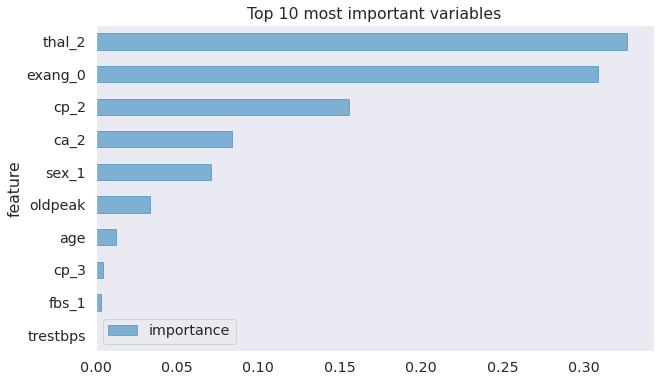

In [36]:
# Plotting the feature importance graph

feature_importances_data = []
features = train_features.columns
for feature_name, feature_importance in zip(features, model_2_XGB.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)

In [37]:
# Installing shap

!pip install shap

In [38]:
import shap
# creating an explainer for our model
explainer_lr = shap.LinearExplainer(model_1_lr,train_features_scaled,feature_perturbation="interventional")

# finding out the shap values using the explainer
shap_values_lr = explainer_lr.shap_values(validation_features_scaled)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer_lr.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values_lr,columns=validation_features.columns).head()

Expected Value: 0.290421888648439


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


age  trestbps      chol  ...    thal_1    thal_2    thal_3
0  0.111675 -0.026764  0.002262  ... -0.087026  0.397267  0.455990
1 -0.001970  0.172425 -0.005608  ... -0.087026 -0.372002 -0.655395
2 -0.645961 -0.026764 -0.001410  ... -0.087026  0.397267  0.455990
3  0.111675  0.637201 -0.023710  ... -0.087026 -0.372002 -0.655395
4  0.073793 -0.026764 -0.002985  ...  1.018928 -0.372002  0.455990

[5 rows x 30 columns]

In [39]:
# Force plot on validation set 

shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr, validation_features)

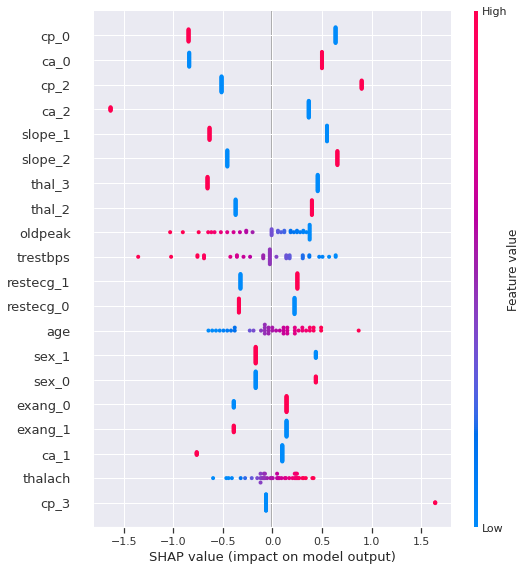

In [40]:
# Summary Plot
shap.initjs()
shap.summary_plot(shap_values_lr, validation_features)

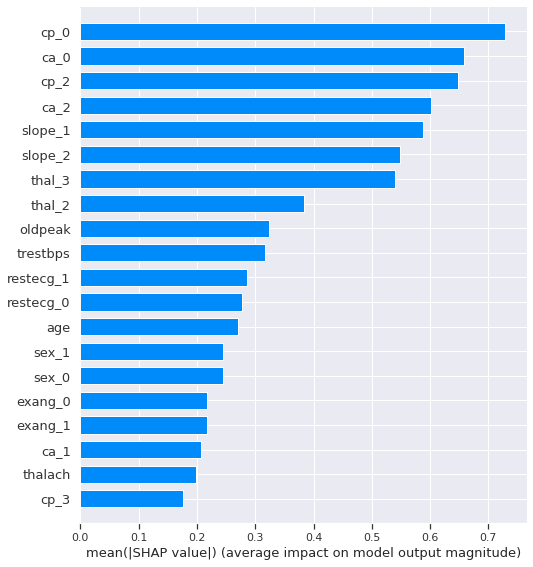

In [41]:
# Summary Plot
shap.initjs()
shap.summary_plot(shap_values_lr, validation_features, plot_type='bar')

In [42]:
# Explaining the individual effect of each features in the second data point of validation dataset

print("Predicted with Heart Disease ? : ",validation_target.iloc[1].astype(int))
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr[1, :], validation_features.iloc[1, :])

Predicted with Heart Disease ? :  0


In [43]:
# Explaining the individual effect of each features in the third data point of validation dataset

print("Predicted with Heart Disease ? : ",validation_target.iloc[2].astype(int))
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr[2, :], validation_features.iloc[2, :])


Predicted with Heart Disease ? :  1


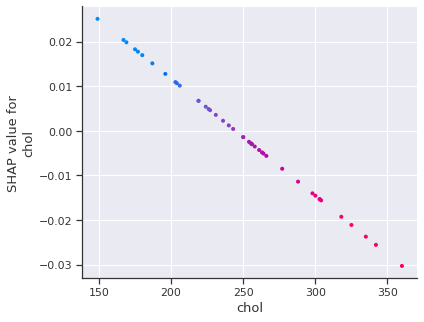

In [44]:
# Partial Dependence plot of chol

shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

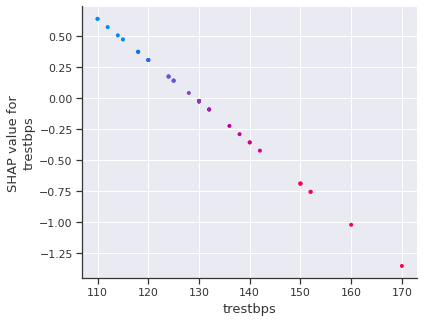

In [45]:
# Partial Dependence plot of trestbps

shap.dependence_plot(ind='trestbps', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

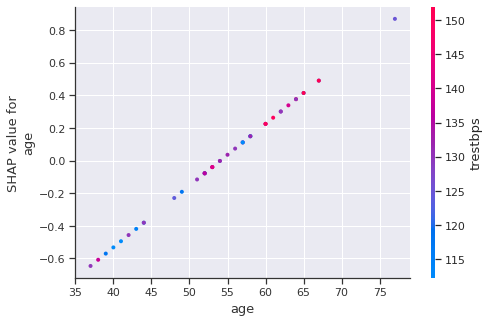

In [46]:
# Partial Dependence plot of age

shap.dependence_plot(ind='age', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

In [47]:


# creating an explainer for our model
explainer_xgb = shap.TreeExplainer(model_2_XGB,train_features_scaled)

# finding out the shap values using the explainer
shap_values_xgb = explainer_xgb.shap_values(validation_features_scaled)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer_xgb.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values_xgb,columns=validation_features.columns).head()

Expected Value: 0.028412546695423088


age  trestbps  chol  thalach  ...  thal_0  thal_1    thal_2  thal_3
0 -0.004188       0.0   0.0      0.0  ...     0.0     0.0  0.009543     0.0
1  0.010656       0.0   0.0      0.0  ...     0.0     0.0 -0.009932     0.0
2  0.016304       0.0   0.0      0.0  ...     0.0     0.0  0.009543     0.0
3 -0.004188       0.0   0.0      0.0  ...     0.0     0.0 -0.009932     0.0
4 -0.012125       0.0   0.0      0.0  ...     0.0     0.0 -0.009932     0.0

[5 rows x 30 columns]

In [48]:
# Force plot on validation set 

shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb, validation_features)

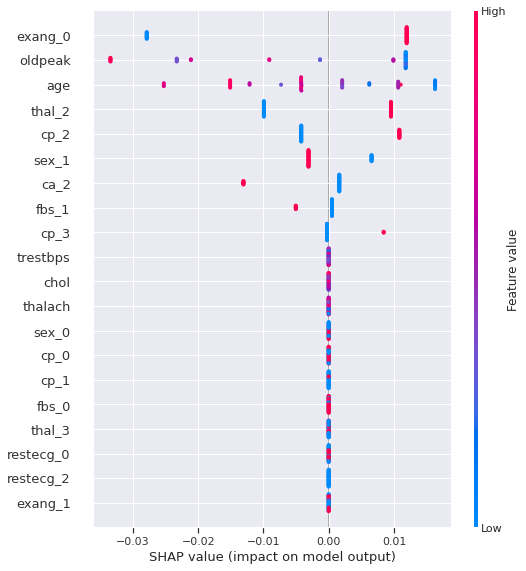

In [49]:
shap.initjs()
shap.summary_plot(shap_values_xgb, validation_features)

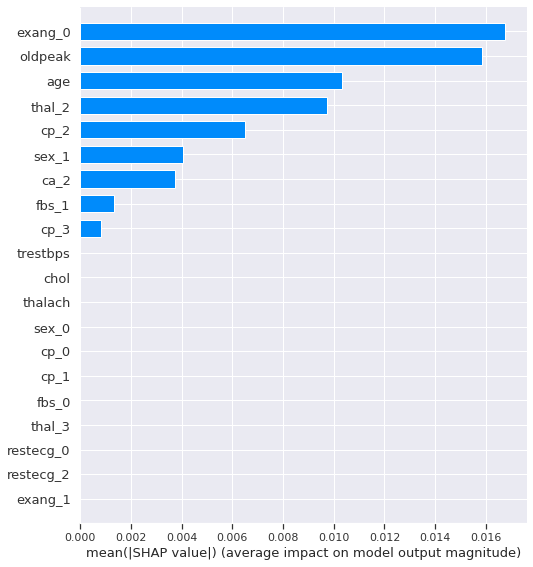

In [50]:
shap.summary_plot(shap_values_xgb, validation_features, plot_type='bar')

In [51]:
# Explaining the individual effect of each features in the 7th data point of validation dataset

print("Predicted with Heart Disease ? : ",validation_target.iloc[6].astype(int))
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[6, :], validation_features.iloc[6, :])

Predicted with Heart Disease ? :  1


In [52]:
# Explaining the individual effect of each features in the 5th data point of validation dataset

print("Predicted with Heart Disease ? : ",validation_target.iloc[4].astype(int))
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[4, :], validation_features.iloc[4, :])

Predicted with Heart Disease ? :  0


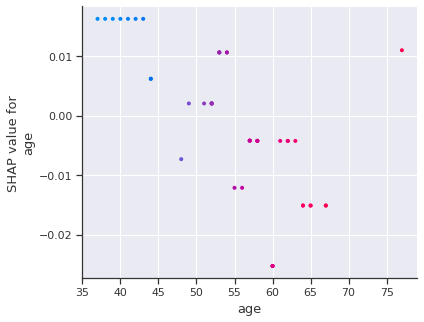

In [53]:
# Dependence plot of age

shap.dependence_plot(ind='age', interaction_index='age',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

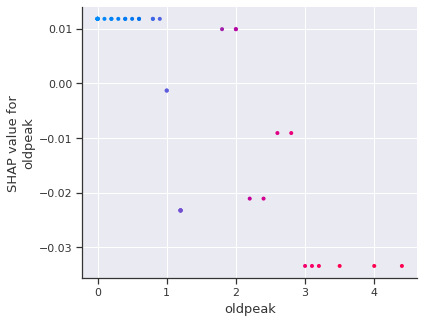

In [54]:
# Dependence plot of trestbps

shap.dependence_plot(ind='oldpeak', interaction_index='oldpeak',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

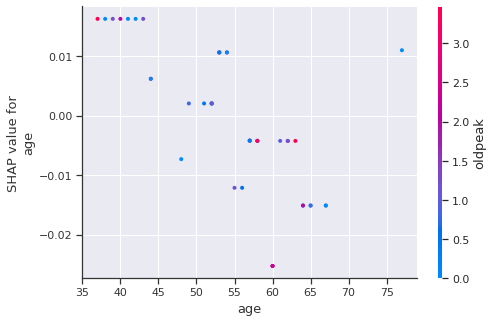

In [55]:
# Dependence plot of age and trestbps

shap.dependence_plot(ind='age', interaction_index='oldpeak',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

In [56]:
# Predicting the value on test data based on Logistic regression model

preds_test_model_1 = model_1_lr.predict(test_features_scaled).astype(int)

In [57]:
# Predicting the value on test data based on XGBoost model


preds_test_model_2 = model_2_XGB.predict(test_features_scaled).astype(int)

In [58]:
# creating a submission dataframe and saving it as a file in csv format

submission_data = pd.DataFrame({'prediction':preds_test_model_2})
submission_data.to_csv('submission_12.csv', index = False)